# Project: Wrangling and Analyze Data

# Table of contents
1. <a href="#Data Gathering">Data Gathering</a>
2. <a href="#Assessing Data">Assessing Data</a>
    - <a href="#Quality issues">Quality issues</a>
    - <a href="#Tidiness issues">Tidiness issues</a>
3. <a href="#Cleaning Data">Cleaning Data</a>
    - <a href="#Issue #1">Issue #1</a>
    - <a href="#Issue #2">Issue #2</a>
    - <a href="#Issue #3">Issue #3</a>
    - <a href="#Issue #4">Issue #4</a>
    - <a href="#Issue #5">Issue #5</a>
    - <a href="#Issue #6">Issue #6</a>
    - <a href="#Issue #7">Issue #7</a>
    - <a href="#Issue #8">Issue #8</a>
    - <a href="#Issue #9">Issue #9</a>
    - <a href="#Issue #10">Issue #10</a>
    - <a href="#Issue #11">Issue #11</a>
4. <a href="#Storing Data">Storing Data</a>
5. <a href="#Analyzing and Visualizing Data">Analyzing and Visualizing Data</a>
    - <a href="#Insights">Insights</a>
    - <a href="#Visualization">Visualization</a>

## Data Gathering <p id="Data Gathering"></p>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [20]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import requests
from PIL import Image
from io import BytesIO
import tweepy
import json
%matplotlib inline

In [21]:
#reading the twitter file
twitter_raw = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [22]:
#reading the tsv file
images_raw = pd.read_csv('image-predictions.tsv',delimiter='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [23]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
with open("tweet_json.txt") as file:
    for line in file:
        tweetlines = json.loads(line)
        tweet_id = tweetlines['id']
        retweet_count = tweetlines['favorite_count']
        favorite_count = tweetlines['retweet_count']
        df_list.append({'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})
    text_raw = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data <p id="Assessing Data "></p>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Describing and checking our data information to checkfo redundancies in our data


In [24]:
# twitter raw 
print(f'description:\n{twitter_raw.describe()}')
print(f'information:\n{twitter_raw.info()}')
twitter_raw.sample(5)

description:
           tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%          

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
670,789986466051088384,NaN,NaN,2016-10-23 00:27:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Happy. He's a bathtub reviewer. Seems ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None
374,828372645993398273,NaN,NaN,2017-02-05 22:40:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexander Hamilpup. He was one of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,None,None,None,None
2244,667886921285246976,NaN,NaN,2015-11-21 02:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Erik. He's fucken massive. But also ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667886921...,11,10,Erik,None,None,None,None
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo
1178,719551379208073216,NaN,NaN,2016-04-11 15:43:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harnold. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719551379...,10,10,Harnold,None,None,None,None


In [25]:
# image raw 
print(f'description:\n {images_raw.describe()}')
print(f'information:\n {images_raw.info()}')
images_raw.sample(5)

description:
            tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 n

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False


In [26]:
# text raw 
print(f'description:\n{text_raw.describe()}')
print(f'information:\n{text_raw.info()}')
text_raw.sample(5)

description:
           tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    8080.968564     3164.797366
std    6.852812e+16   11814.771334     5284.770364
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17    1415.000000      624.500000
50%    7.194596e+17    3603.500000     1473.500000
75%    7.993058e+17   10122.250000     3652.000000
max    8.924206e+17  132810.000000    79515.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB
information:
None


,tweet_id,retweet_count,favorite_count
1333,705239209544720384,3290,854
368,828650029636317184,10467,1544
1505,691675652215414786,2116,577
1681,681694085539872773,14010,4581
162,860276583193509888,19154,3745


#### From the above description and info and by checking random samples, the following issues can be deduced:

### Quality issues <p id="Quality issues"></p>
1. Timestamp is in object format.

2. Rating denominators has values other than 10.

3. Retweeted tweets to be dropped.

4. Creating another column named date extracted from the Timestamp column.

5. Dogs with unreasonable names like 'a' to be replaced with unknown.

6. Dogs with names as 'None' be replaced with unknown.

7. Dog stages contains null values(None).

8. image file columns not descriptive enough.

### Tidiness issues
1. Dropping irrelevant columns.

2. Dog stages are represented with multiple columns.

3. P2, P2_conf, P2_dog,P3, P3_conf, P3_dog columns may not be needed.

## Cleaning Data <p id="Cleaning Data"></p>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
twitter_raw_copy = twitter_raw.copy()
images_raw_copy = images_raw.copy()
text_raw_copy = text_raw.copy()

### Issue #1 <p id="Issue #1"></p>

#### Define: Changing the timestamp format into the datetime format using pandas to_datetime

#### Code <p id="Code"></p>

In [28]:
twitter_raw_copy['timestamp'] = pd.to_datetime(twitter_raw_copy['timestamp'])

#### Test <p id="Test"></p>

In [29]:
twitter_raw_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2 <p id="Issue #2"></p>

#### Define: Change all the rating denominator values to 10

#### Code <p id="Code"></p>

In [30]:
twitter_raw_copy['rating_denominator'] = 10 

#### Test <p id="Test"></p>

In [31]:
twitter_raw_copy[twitter_raw_copy['rating_denominator'] != 10].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

### Issue #3 <p id="Issue #3"></p>

#### Define: Using the apply function to filter the retweets.

#### Code

In [32]:
twitter_raw_copy = twitter_raw_copy[twitter_raw_copy['retweeted_status_id'].isnull()]

#### Test

In [33]:
twitter_raw_copy['retweeted_status_id'].unique()

array([ nan])

### Issue #4 <p id="Issue #4"></p>

#### Define: Creating two new columns with the name date and time and time and dropping the timestamp column

#### Code

In [34]:
twitter_raw_copy['date'] = twitter_raw_copy['timestamp'].dt.date
twitter_raw_copy['time'] = twitter_raw_copy['timestamp'].dt.time

#### Test

In [35]:
list(twitter_raw_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'date',
 'time']

### Issue #5 <p id="Issue #5"></p>

#### Define: Replacing irrelevant dog names with unknown

#### Code

In [36]:
twitter_raw_copy['name'][twitter_raw_copy['name'] == 'a'] = 'unknown'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [37]:
twitter_raw_copy[twitter_raw_copy['name'] == 'a'].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
date                          0
time                          0
dtype: int64

### Issue #6 <p id="Issue #6"></p>

#### Define: Replacing Dogs with None as their name with unknown



#### Code

In [38]:
twitter_raw_copy['name'][twitter_raw_copy['name'] == 'None'] = 'unknown'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [39]:
twitter_raw_copy[twitter_raw_copy['name'] == 'None'].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
date                          0
time                          0
dtype: int64



### Issue #7 <p id="Issue #7"></p>

#### Define: Renaming the Dog stages with values None with ' '

#### Code

In [40]:
twitter_raw_copy['doggo'][twitter_raw_copy['doggo'] == "None"] = ' '
twitter_raw_copy['floofer'][twitter_raw_copy['floofer'] == "None"] = ' '
twitter_raw_copy['pupper'][twitter_raw_copy['pupper'] == "None"] = ' '
twitter_raw_copy['puppo'][twitter_raw_copy['puppo'] == "None"] = ' '

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

#### Test

In [41]:
twitter_raw_copy['doggo'][twitter_raw_copy['doggo'] == "None"]

Series([], Name: doggo, dtype: object)



### Issue #8 <p id="Issue #8"></p>

#### Define: Renaming the image file columns 

#### Code

In [42]:
images_raw_copy.rename(columns = {"img_num":"image_number",
                       "p1":"prediction_1",
                       "p1_conf":"prediction_1_confidence_level",
                       "p1_dog":"is_prediction_1_dog",
                       "p2":"prediction_2",
                       "p2_conf":"prediction_2_confidence_level",
                       "p2_dog":"is_prediction_2_dog",
                       "p3":"prediction_3",
                       "p3_conf":"prediction_3_confidence_level",
                       "p3_dog":"is_prediction_3_dog",
                       },inplace=True)

#### Test

In [43]:
list(images_raw_copy)

['tweet_id',
 'jpg_url',
 'image_number',
 'prediction_1',
 'prediction_1_confidence_level',
 'is_prediction_1_dog',
 'prediction_2',
 'prediction_2_confidence_level',
 'is_prediction_2_dog',
 'prediction_3',
 'prediction_3_confidence_level',
 'is_prediction_3_dog']

### Issue #9: <p id="Issue #9"></p>

#### Define: Using the pandas DataFrame lists format of getting columns

#### Code

In [44]:
lists = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator','name','retweeted_status_user_id','doggo','floofer','pupper','puppo']
twitter_raw_copy = twitter_raw_copy[lists]

#### Test

In [45]:
twitter_raw_copy.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,retweeted_status_user_id,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,NaN,,,,
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,NaN,,,,
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,NaN,,,,
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,NaN,,,,
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,NaN,,,,


### Issue #10: <p id="Issue #10"></p>

#### Define: By changing each column under the dog stages into a string and inserting them each into a single column named dog stages[doggo, floofer, pupper, and puppo] and dropping the columns.

#### Code

In [46]:
twitter_raw_copy['dog_stage'] = twitter_raw_copy['doggo'] + twitter_raw_copy['floofer'] + twitter_raw_copy['pupper'] + twitter_raw_copy['puppo']
twitter_raw_copy['dog_stage'] = twitter_raw_copy['dog_stage'].str.replace('    ','-')
twitter_raw_copy.drop(columns = ['doggo','floofer','puppo','pupper'], inplace=True)

#### Test

In [47]:
twitter_raw_copy['dog_stage'].sample

<bound method NDFrame.sample of 0               -
1               -
2               -
3               -
4               -
5               -
6               -
7               -
8               -
9        doggo   
10              -
11              -
12          puppo
13              -
14          puppo
15              -
16              -
17              -
18              -
20              -
21              -
22              -
23              -
24              -
25              -
26              -
27              -
28              -
29        pupper 
30              -
          ...    
2326            -
2327            -
2328            -
2329            -
2330            -
2331            -
2332            -
2333            -
2334            -
2335            -
2336            -
2337            -
2338            -
2339            -
2340            -
2341            -
2342            -
2343            -
2344            -
2345            -
2346            -
2347            -
2348          

### Issue #11 <p id="Issue #11"></p>

#### Define: P2, P2_conf, P2_dog,P3, P3_conf, P3_dog columns will be dropped using the pandas DataFrame .drop

#### Code

In [48]:
lists = ['prediction_2', 'prediction_2_confidence_level', 'is_prediction_2_dog','prediction_3', 'prediction_3_confidence_level', 'is_prediction_3_dog']
images_raw_copy.drop(lists,axis=1,inplace=True)

#### Test

In [49]:
images_raw_copy.head()

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_confidence_level,is_prediction_1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [50]:
new_file = twitter_raw_copy.merge(images_raw_copy,on='tweet_id')
final_df = new_file.merge(text_raw_copy, on='tweet_id')
final_df.drop('retweeted_status_user_id',axis=1,inplace=True)

## Storing Data <p id="Storing Data"></p>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
final_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data <p id="Analyzing and Visualizing Data"></p>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [52]:
df = pd.read_csv('twitter_archive_master.csv')

### Insights: <p id="Insights"></p>
1. What is the average dog ratings ?
    - Ans: According to the describe table the average dog rating is 12.28 or approximately 12.3

2. What is the most common breed(predicted) of dog tweeted ?
    - Ans: According the value counts of the prediction_1(used as a result of the high level of confidence) used, the most common dg breed is **The golden retriever**.

3. What is the highest rating ?
    - Ans: According to the ratings column value counts the highest rating gave by a user is **1776**.
4. What is the most rated value ?
    - Ans: The most rated value is **12** with 450 counts.

### Visualization

### Graph showing the most common dog breed according to predictions

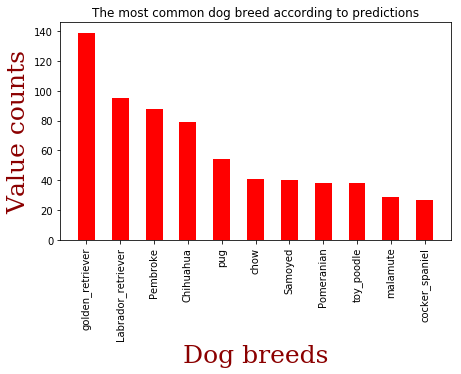

In [55]:
#Graph showing the most common dog breed predicted using pandas plot.
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }
width = 0.5
a = dict(df['prediction_1'].value_counts())
name_list = [name for name in a.keys()][0:11]
values = [name for name in a.values()][0:11]
n = np.arange(len(values))
plt.figure(figsize=(7,4))
plt.bar(n,values,width,color="red")
plt.xticks(n,name_list,rotation=90,fontsize=10)
plt.xlabel('Dog breeds',fontdict=font)
plt.ylabel('Value counts',fontdict=font)
plt.title("The most common dog breed according to predictions")
plt.savefig("most_common_dog_breed.png")